# Introduction

This analysis draws on the **World Bank Global Findex Microdata** collected in 2024 to examine the financial inclusion landscape in the **Philippine economy**, with a focus on three interrelated dimensions. First, it explores **how Filipinos save for old age** across different income quintiles, a window into the country’s preparedness for long-term financial security. Second, it investigates patterns of **borrowing, whether through formal institutions or informal sources**, to reveal how credit access and trust in financial systems relate to educational attainment. Finally, it assesses the use of **digital financial channels** across different age groups, highlighting the promise and limits of digitalization in closing inclusion gaps.

# Preliminaries

In [1]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# format cell outputs to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# Read dataset
df = pd.read_csv("../data/findex_microdata_2025_labelled.csv")

# Read indicator mapping
findex_map = pd.read_excel("../data/indicator-mapping-by-economy.xlsx", sheet_name="Findex")

In [3]:
print(f"\nThe shape of the dataset is: {df.shape:}.\n")
df.head(3)


The shape of the dataset is: (144090, 183).



,year,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,emp_in,urbanicity,account_fin,account_mob,account,dig_account,borrowed,saved,receive_wages,receive_transfers,receive_pensions,receive_agriculture,merchantpay_dig,pay_utilities,domestic_remittances,anydigpayment,fin2,fin3,fin4,fin5,fin6,fin7,fin8,fin9a,fin9b,fin10,fin11_0,fin11_1,fin11_2,fin11a,fin11b,fin11c,fin11d,fin11e,fin11f,fin13_1,fin13a,fin13b,fin13c,fin13d,fin13e,fin13f,fin13f_1,fin14a,fin14b,fin14c,fin14d,fin14e,fin15,fin16,fin17a,fin17b,fin17c,fin17d,fin17e,fin17f,fin18,fin19,fin20,fin21,fin22a,fin22a_1,fin22b,fin22c,fin22d,fin22e,fin22f,fin22g,fin22h,fin23,fin24,fin24a,fin24b,fin24c,fin24d1,fin24d2,fin24d3,fin25e1,fin25e2,fin25e3,fin25e4,fin26a,fin26b,fin27,fh1,fin28,fh2,fin29,fh2a,fin30,fin31a,fin31b,fin31c,fin31d,fin32,fin33,fin34a,fin34b,fin34c,fin34d,fin35,fin36,fin36a,fin37,fin38,fin39a,fin39b,fin39c,fin39d,fin40,fin41,fin41a,fin42,fin43a,fin43b,fin43c,fin43d,fin44,fin45,internet_use,con1,con2a,con2b,con2c,con2d,con2e,con2f,con2g,con3,con4,con5,con6,con7,con8,con9,con10,con11,con12,con13,con14,con15,con16,con17,con18,con19,con20,con21,con22,con23,con24,con25,con26,con27,con28,con29,con30a,con30b,con30c,con30d,con30e,con30f,con30g,con30h,con31a,con31b,con31c,con31d,con31e,con31f,con31g,con31h,con32
0,2024,United States,USA,High income,275987833,128382770,3.262664,2,33,2.0,4.0,1.0,2.0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024,United States,USA,High income,275987833,156724799,3.193278,1,52,3.0,2.0,1.0,2.0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024,United States,USA,High income,275987833,159725273,0.593859,2,28,3.0,4.0,1.0,2.0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(findex_map.shape)
findex_map.head(3)

(117, 4)


,Indicator Name,Filter,Question,Key
0,Fin1,NaN,"An account can be used to keep or save money, to make or receive payments, or to receive wages, government payments, or financial help. Do you currently have an account at a bank, [insert all financial institutions], or similar formal financial institution? Yes or no?",1
1,Fin2,NaN,"[Insert local terminology for a/an ATM/debit card] is a card connected to an account that allows you to withdraw money or buy things, and the money is taken out of that account right away. Do you, personally, have [insert local terminology for a/an ATM/debit card]? Yes or no?",1
2,Fin3,"Fin1 or Fin2 = ""yes""","Thinking ONLY about your account at a bank or similar financial institution, in the past 12 months, did you use a card or a mobile phone to make payments, buy things, or to send or receive money using your account? Yes or no?",2


# Clean indicator mapping

In [5]:
findex_map.columns = findex_map.columns.str.strip().str.lower().str.replace(" ", "_")
findex_map['indicator_name'] = findex_map['indicator_name'].apply(lambda x: str(x).lower())
findex_map.head()

,indicator_name,filter,question,key
0,fin1,NaN,"An account can be used to keep or save money, to make or receive payments, or to receive wages, government payments, or financial help. Do you currently have an account at a bank, [insert all financial institutions], or similar formal financial institution? Yes or no?",1
1,fin2,NaN,"[Insert local terminology for a/an ATM/debit card] is a card connected to an account that allows you to withdraw money or buy things, and the money is taken out of that account right away. Do you, personally, have [insert local terminology for a/an ATM/debit card]? Yes or no?",1
2,fin3,"Fin1 or Fin2 = ""yes""","Thinking ONLY about your account at a bank or similar financial institution, in the past 12 months, did you use a card or a mobile phone to make payments, buy things, or to send or receive money using your account? Yes or no?",2
3,fin4,"Fin1 or Fin2 = ""yes""","Thinking about the first account you opened, did you open it to receive a wage or salary payment or money from the government? Yes or no?",2
4,fin5,"Fin1 or Fin2 = ""yes""","In a typical month, how often is money deposited into your personal account(s)? This includes cash or electronic deposits, or any time money is put into your account. Weekly, monthly, or less than once a month?",3


In [6]:
findex_map.iloc[103:110]

,indicator_name,filter,question,key
103,fin44,"Fin42 = ""yes""","Do you use a phone or the Internet to access information such as weather updates, pest control, or farming tips?",3
104,fin45,NaN,"Which of the following financial issues are you MOST worried about? Please choose only one option. Are you most worried about not having enough money…?\n1. For your old age\n2. For your business\n3. For medical costs in case of a serious illness or accident\n4.For monthly expenses, such as food, housing, or bills\n5. For school or education fees\n6. Some other reason",2
105,nan,NaN,NaN,NaN
106,"note: “no/dk/r” indicates the response categories: no, dk = “don’t know”, and r = “refused”.\nwords in brackets [ ] indicate local or economy-specific terminology.",NaN,NaN,NaN
107,nan,NaN,NaN,NaN
108,key,Countries Surveyed,List of Countries,NaN
109,1,141,"Albania, Algeria, Argentina, Armenia, Australia, Austria, Azerbaijan, Bahrain, Bangladesh, Belgium, Belize, Benin, Bolivia, Bosnia and Herzegovina, Botswana, Brazil, Bulgaria, Burkina Faso, Cambodia, Cameroon, Canada, Chad, Chile, China, Colombia, Comoros, Congo, Dem. Rep., Congo, Rep., Costa Rica, Côte d'Ivoire, Croatia, Cyprus, Czechia, Denmark, Dominican Republic, Ecuador, Egypt, Arab Rep., El Salvador, Estonia, Eswatini, Ethiopia, Finland, France, Gabon, Gambia, The, Georgia, Germany, Ghana, Greece, Guatemala, Guinea, Honduras, Hong Kong SAR, China, Hungary, Iceland, India, Indonesia, Iran, Islamic Rep., Iraq, Ireland, Israel, Italy, Japan, Jordan, Kazakhstan, Kenya, Korea, Rep., Kosovo, Kuwait, Kyrgyz Republic, Lao PDR, Latvia, Lebanon, Lesotho, Liberia, Libya, Lithuania, Madagascar, Malawi, Malaysia, Mali, Malta, Mauritania, Mauritius, Mexico, Moldova, Mongolia, Montenegro, Morocco, Mozambique, Namibia, Nepal, Netherlands, New Zealand, Nicaragua, Niger, Nigeria, North Macedonia, Norway, Oman, Pakistan, Panama, Paraguay, Peru, Philippines, Poland, Portugal, Romania, Russian Federation, Saudi Arabia, Senegal, Serbia, Sierra Leone, Singapore, Slovak Republic, Slovenia, South Africa, Spain, Sri Lanka, Sweden, Switzerland, Taiwan, China, Tajikistan, Tanzania, Thailand, Togo, Trinidad and Tobago, Tunisia, Türkiye, Uganda, Ukraine, United Arab Emirates, United Kingdom, United States, Uruguay, Uzbekistan, Venezuela, RB, Viet Nam, West Bank and Gaza, Zambia, Zimbabwe.",NaN


### Drop mapping section on questionnaire keys.

In [7]:
# The Findex mapping ends at index 104; drop 105 and beyond.
findex_map = findex_map.iloc[:105]
findex_map.tail()

,indicator_name,filter,question,key
100,fin43b,"Fin42 = ""yes""","In the past 12 months, have you received money for the sale of agricultural products, crops, produce, or livestock in any of the following ways? You received payments through a mobile phone",3
101,fin43c,"Fin43A and Fin43B = ""no/dk/r""","In the past 12 months, have you received money for the sale of agricultural products, crops, produce, or livestock in cash?",3
102,fin43d,"Fin43C = ""no/dk/r""","In the past 12 months, have you received money for the sale of agricultural products, crops, produce, or livestock to a card?",3
103,fin44,"Fin42 = ""yes""","Do you use a phone or the Internet to access information such as weather updates, pest control, or farming tips?",3
104,fin45,NaN,"Which of the following financial issues are you MOST worried about? Please choose only one option. Are you most worried about not having enough money…?\n1. For your old age\n2. For your business\n3. For medical costs in case of a serious illness or accident\n4.For monthly expenses, such as food, housing, or bills\n5. For school or education fees\n6. Some other reason",2


### Drop Findex variables with Keys 6,7,8 and Connectivity variables with Key 4 since these are not part of the Philippine questionnaire.

In [8]:
findex_map.loc[findex_map['key'] == '1 (where mobile money products are available)', 'key'] = 1

In [9]:
findex_map['key'] = findex_map['key'].astype('int')

In [10]:
findex_map = findex_map[~(findex_map['key']>=6)].reset_index(drop=True)

In [11]:
print(f"Remaining Findex variables: {findex_map.shape[0]}")

Remaining Findex variables: 88


# Clean Philippines data

In [12]:
# Filter to only the Philippines economy
ph = df[df['economy']=='Philippines'].copy()

In [13]:
ph.head(3)

,year,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,emp_in,urbanicity,account_fin,account_mob,account,dig_account,borrowed,saved,receive_wages,receive_transfers,receive_pensions,receive_agriculture,merchantpay_dig,pay_utilities,domestic_remittances,anydigpayment,fin2,fin3,fin4,fin5,fin6,fin7,fin8,fin9a,fin9b,fin10,fin11_0,fin11_1,fin11_2,fin11a,fin11b,fin11c,fin11d,fin11e,fin11f,fin13_1,fin13a,fin13b,fin13c,fin13d,fin13e,fin13f,fin13f_1,fin14a,fin14b,fin14c,fin14d,fin14e,fin15,fin16,fin17a,fin17b,fin17c,fin17d,fin17e,fin17f,fin18,fin19,fin20,fin21,fin22a,fin22a_1,fin22b,fin22c,fin22d,fin22e,fin22f,fin22g,fin22h,fin23,fin24,fin24a,fin24b,fin24c,fin24d1,fin24d2,fin24d3,fin25e1,fin25e2,fin25e3,fin25e4,fin26a,fin26b,fin27,fh1,fin28,fh2,fin29,fh2a,fin30,fin31a,fin31b,fin31c,fin31d,fin32,fin33,fin34a,fin34b,fin34c,fin34d,fin35,fin36,fin36a,fin37,fin38,fin39a,fin39b,fin39c,fin39d,fin40,fin41,fin41a,fin42,fin43a,fin43b,fin43c,fin43d,fin44,fin45,internet_use,con1,con2a,con2b,con2c,con2d,con2e,con2f,con2g,con3,con4,con5,con6,con7,con8,con9,con10,con11,con12,con13,con14,con15,con16,con17,con18,con19,con20,con21,con22,con23,con24,con25,con26,con27,con28,con29,con30a,con30b,con30c,con30d,con30e,con30f,con30g,con30h,con31a,con31b,con31c,con31d,con31e,con31f,con31g,con31h,con32
101871,2024,Philippines,PHL,East Asia & Pacific (excluding high income),82023644,160484868,0.254052,2,52,2.0,2.0,2.0,1.0,1,0.0,1,0.0,0.0,1.0,2.0,1.0,4.0,4.0,0.0,2.0,3.0,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,NaN,NaN,NaN,1.0,2.0,2.0,NaN,2.0,2.0,2.0,NaN,2.0,2.0,2.0,NaN,NaN,2.0,3.0,2.0,4.0,2.0,NaN,NaN,NaN,2.0,2.0,NaN,4.0,2.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,1.0,2.0,2.0,NaN,1.0,1.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,1.0,2.0,1.0,2.0,NaN,NaN,1.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,4.0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,2.0,NaN,1.0,NaN,1.0,1.0,2.0,NaN,2.0,2.0,NaN,2.0,1,NaN,2.0,1.0,4.0,NaN,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101872,2024,Philippines,PHL,East Asia & Pacific (excluding high income),82023644,186479019,1.368970,2,18,2.0,1.0,2.0,1.0,0,0.0,0,0.0,1.0,1.0,4.0,4.0,4.0,4.0,0.0,2.0,1.0,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,NaN,NaN,NaN,1.0,2.0,2.0,NaN,2.0,2.0,2.0,NaN,1.0,2.0,1.0,NaN,NaN,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,NaN,4.0,2.0,2.0,NaN,2.0,NaN,1.0,1.0,1.0,1.0,2.0,2.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,4.0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1,NaN,1.0,2.0,NaN,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101873,2024,Philippines,PHL,East Asia & Pacific (excluding high income),82023644,174179325,4.521343,1,72,1.0,1.0,2.0,1.0,0,0.0,0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,0.0,4.0,3.0,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,3.0,1.0,1.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,2.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,2.0,2.0,NaN,NaN,2.0,8.0,NaN,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,7.0,0,2,2.0,8.0,8.0,1.0,8.0,8.0,2.0,4.0,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Quick inspection of column variability
# Decision Point: Columns to keep/drop
for col in ph.columns:
    print(ph[col].value_counts(), "\n")

year
2024    1000
Name: count, dtype: int64 

economy
Philippines    1000
Name: count, dtype: int64 

economycode
PHL    1000
Name: count, dtype: int64 

regionwb
East Asia & Pacific (excluding high income)    1000
Name: count, dtype: int64 

pop_adult
82023644    1000
Name: count, dtype: int64 

wpid_random
160484868    1
111617499    1
187800241    1
127791845    1
152732510    1
            ..
138327371    1
119377657    1
188778892    1
204214622    1
134059261    1
Name: count, Length: 1000, dtype: int64 

wgt
0.131551    150
4.521343     50
0.213991     17
0.302479      8
0.322853      7
           ... 
1.253096      1
1.438292      1
0.684404      1
0.161649      1
2.216699      1
Name: count, Length: 469, dtype: int64 

female
1    566
2    434
Name: count, dtype: int64 

age
33    26
36    26
30    25
18    25
23    25
      ..
82     1
89     1
85     1
83     1
88     1
Name: count, Length: 73, dtype: int64 

educ
2.0    542
1.0    380
3.0     78
Name: count, dtype: int64 



- Constant variables **to be dropped** ['year', 'economy', 'economycode', 'regionwb', 'pop_adult'] <br>
- Unique ID per respondent **set as df index** ['wpid_random'] <br>
- Empty columns **to be dropped** <br>

In [15]:
ph = (ph
    .set_index(['wpid_random'])
    .drop(columns=['year', 'economy', 'economycode', 'regionwb', 'pop_adult'])
    .dropna(axis=1, how='all')
     )

In [16]:
ph.describe()

,wgt,female,age,educ,inc_q,emp_in,urbanicity,account_fin,account_mob,account,dig_account,borrowed,saved,receive_wages,receive_transfers,receive_pensions,receive_agriculture,merchantpay_dig,pay_utilities,domestic_remittances,anydigpayment,fin2,fin3,fin4,fin5,fin6,fin7,fin8,fin9a,fin9b,fin10,fin11_0,fin11_1,fin11_2,fin11a,fin11b,fin11c,fin11d,fin11e,fin11f,fin17a,fin17b,fin17c,fin17d,fin17e,fin17f,fin18,fin19,fin20,fin21,fin22a,fin22a_1,fin22b,fin22c,fin22d,fin22e,fin22f,fin22g,fin22h,fin23,fin24,fin24a,fin24b,fin24c,fin24d1,fin24d2,fin24d3,fin25e1,fin25e2,fin25e3,fin25e4,fin26a,fin26b,fin27,fh1,fin28,fh2,fin29,fh2a,fin30,fin31a,fin31b,fin31c,fin31d,fin32,fin33,fin34a,fin34b,fin34c,fin34d,fin35,fin36,fin37,fin38,fin39a,fin39b,fin39c,fin39d,fin40,fin41,fin42,fin43a,fin43b,fin43c,fin43d,fin44,fin45,internet_use,con1,con2a,con2b,con2c,con2d,con2e,con2f,con2g,con3,con4,con5,con6,con7,con8,con9,con10,con11,con12,con13,con14,con16,con17,con18,con19,con20,con21,con22,con23,con24,con25,con26,con27,con28,con29,con30a,con30b,con30c,con30d,con30e,con30f,con30g,con30h,con31a,con31b,con31c,con31d,con31e,con31f,con31g,con31h,con32
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,280.000000,280.000000,280.000000,280.000000,136.000000,280.000000,280.000000,280.000000,280.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,1000.000000,366.000000,1000.000000,207.000000,207.000000,207.000000,751.000000,1000.000000,1000.000000,64.000000,1000.00000,366.000000,1000.000000,68.000000,1000.000000,1000.000000,1000.000000,19.000000,10.000000,469.000000,1000.000000,956.000000,1000.000000,1000.000000,775.000000,775.000000,418.000000,529.000000,529.000000,83.000000,446.000000,529.000000,529.000000,245.000000,1000.00000,276.000000,1000.000000,379.000000,1000.00000,1000.00000,783.000000,783.000000,15.000000,670.000000,1000.000000,343.000000,343.000000,343.000000,248.000000,18.000000,96.000000,96.000000,1000.000000,1000.000000,382.000000,382.000000,305.000000,92.000000,87.000000,87.000000,1000.000000,143.000000,143.000000,137.000000,21.000000,143.000000,1000.000000,1000.000000,1000.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,190.000000,202.000000,86.000000,86.000000,86.000000,116.000000,798.000000,108.000000,798.000000,798.000000,39.000000,798.000000,558.000000,798.000000,798.000000,569.000000,798.000000,798.000000,253.000000,798.000000,1000.00000,347.000000,688.000000,688.000000,362.000000,326.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,104.000000
mean,1.000000,1.434000,41.506000,1.69800,3.215000,1.431000,1.380000,0.339000,0.258000,0.489000,0.295000,0.731000,0.52000,3.23600,3.333000,3.750000,3.727000,0.095000,2.331000,2.24800,0.384000,1.796000,1.635714,1.417857,2.785714,2.721429,1.661765,1.639286,1.771429,1.650000,1.932143,1.965204,1.863843,1.642965,1.571861,1.488654,1.602118,1.291982,1.721634,1.780635,1.907000,1.557377,1.932000,2.309179,1.792271,1.719807,1.640479,1.904000,1.937000,1.203125,1.91700,1.904372,1.507000,1.691176,1.604000,1.876000,1.599000,1.473684,1.400000,1.820896,2.794000,1.384937,3.014000,1.225000,1.237419,1.424516,1.708134,1.854442,1.846881,2.096386,3.365471,1.792060,1.536862,1.987755,1.72400,1.467391,1.622000,1.509235,1.80400,1.21800,1.934866,1.886335,1.733333,1.013433,1.658000,1.807580,1.787172,1.874636,1.072581,1.944444,1.770833,1.468750,1.671000,1.878000,1.832461,1.960733,1.301639,1.902174,1.448276,1.816092,1.857000,1.965035,1.993007,1.153285,1.952381,1.496503,3.618000,0.688000,1.202000,1.346535,1.569307,1.777228,1.480198,2.064356,1.811881,1.574257,5.815789,1.603960,1.174419,1.860465,1.674419,1.241

In [17]:
# Recode relevant the columns
ph['gender'] = ph['female'].map({1: 'Female', 2: 'Male'})
ph['education'] = ph['educ'].map({1:'Primary or less', 2:'Secondary', 3:'Tertiary'})
ph['income_quintile'] = ph['inc_q'].map({
    1: 'Poorest 20%',
    2: 'Second 20%',
    3: 'Middle 20%',
    4: 'Fourth 20%',
    5: 'Richest 20%'
})

In [18]:
# Check formula for weighted proportion
(ph.groupby(['gender'])[['account', 'wgt', 'gender']]
    .apply(lambda x: (x['account']*x['wgt']).sum() / x['wgt'].sum())
    .reset_index(name='acct_owned')
)

,gender,acct_owned
0,Female,0.571016
1,Male,0.430424


# Functions

In [19]:
def categorize_generation(age):
    """
    Categorize a person's generation based on their age.

    Parameters:
        age (int or float): Age as of 2024.

    Returns:
        str: Generation label.
    """

    # handle missing values safely
    if pd.isnull(age):
        return None  

    birth_year = 2024 - age

    if 1928 <= birth_year <= 1945:
        return "Silent Generation (1928 to 1945)"
    elif 1946 <= birth_year <= 1964:
        return "Baby Boomers (1946 to 1964)"
    elif 1965 <= birth_year <= 1980:
        return "Generation X (1965 to 1980)"
    elif 1981 <= birth_year <= 1996:
        return "Millennials (1981 to 1996)"
    elif 1997 <= birth_year <= 2012:
        return "Generation Z (1997 to 2012)"
    else:
        return "Unknown"

ph['generation'] = ph['age'].apply(categorize_generation)

In [20]:
def categorize_milestone(age):
    """
    Categorize a person's age group based on their age.

    Parameters:
        age (int or float): Age as of 2024.

    Returns:
        str: Group label.
    """

    # handle missing values safely
    if pd.isnull(age):
        return None  

    if age < 21:
        return "Students (less than 21 years old)"
    elif 21 <= age <= 35:
        return "Young Professionals (21 to 35 years old)"
    elif 36 <= age <= 50:
        return "Family Builders (36 to 50 years old)"
    elif 51 <= age <= 64:
        return "Pre-retirees (51 to 64 years old)"
    elif 65 <= age:
        return "Retirees (65 years old and above)"
    else:
        return "Unknown"

ph['age_group'] = ph['age'].apply(categorize_milestone)

In [21]:
def classify_borrowing(row):
    """
    Classify an individual's borrowing type based on financial survey responses.

    Parameters
    row : pandas.Series
        A row of data containing the following columns:
        - 'fin22a' : int or float
            Indicator for formal borrowing or borrowing status.
        - 'fin22a_1' : int or float
            Secondary indicator for formal borrowing.
        - 'fin22b' : int or float
            Indicator for informal borrowing type 1.
        - 'fin22c' : int or float
            Indicator for informal borrowing type 2.

    Returns
    str: A classification label based on the respondent's borrowing behavior
    """
    
    if (row['fin22a'] == 1) or (row['fin22a_1'] == 1):
        return 'Formal'
    elif (row['fin22b'] == 1) or (row['fin22c'] == 1):
        return 'Informal'
    elif (row['fin22a'] == 2) or (row['fin22a'] == 3):
        return 'No Borrowing'   

In [22]:
def compute_weighted_proportion(df, col1, col2):
    """
    Calculate weighted proportion on multiple levels of groupings.

    Parameters:
        col1 (object): first indicator grouping
        col2 (int): second indicator grouping

    Returns:
        grouped_pivot (dataframe): Data ready for plot.
    """
    grouped = (df.groupby([col1, col2], as_index=False)['wgt']
                    .sum()
                    .assign(weighted_proportion=lambda x: x['wgt'] / x.groupby(col1)['wgt'].transform('sum'))
                    .drop(columns='wgt'))

    grouped_pivot = grouped.pivot(index=col1, 
                              columns=col2, 
                              values='weighted_proportion')

    return grouped_pivot

In [23]:
def plot_stacked_barh(data, responses, palette, plot_title):
    """
    Plot a stacked horizontal barplot of the data.
    """
    ax = data[responses].plot(kind='barh', 
                                 stacked=True,
                                 width=0.75,
                                 figsize=(6.5,4),
                                 color=palette
                                )

    ax.set_ylabel('')
    ax.tick_params(axis='y', labelsize=10)
    ax.set_xlabel('Weighted Proportion', fontsize=10)
    ax.tick_params(axis='x', labelsize=10)
    plt.xlim(0,1)
    ax.set_title(plot_title, fontsize=12)
    plt.legend(title='Response', bbox_to_anchor=(1.005, 1), loc='upper left', fontsize=10);

# Analysis on Financial Inclusion in the Philippines

## Saving for old age by income quintile

In [24]:
findex_map[findex_map['question'].str.contains("old age")]

,indicator_name,filter,question,key
26,fin17f,"Fin17A or Fin17B = ""yes""","In the past 12 months, have you saved or set aside any money for your old age?",2
87,fin45,NaN,"Which of the following financial issues are you MOST worried about? Please choose only one option. Are you most worried about not having enough money…?\n1. For your old age\n2. For your business\n3. For medical costs in case of a serious illness or accident\n4.For monthly expenses, such as food, housing, or bills\n5. For school or education fees\n6. Some other reason",2


In [25]:
# Recode the response to Indicator Fin17F
fin17f_map = {
    1: 'Yes',
    2: 'No',
    3: 'Don’t know',
    4: 'Refused'
}

ph['saved_for_old_age'] = ph['fin17f'].map(fin17f_map)

In [26]:
saving_old_age = compute_weighted_proportion(ph, col1='income_quintile', col2='saved_for_old_age')

inc_q_order = [
    'Poorest 20%',
    'Second 20%',
    'Middle 20%',
    'Fourth 20%',
    'Richest 20%'
]

saving_old_age = saving_old_age.reindex(inc_q_order)
saving_old_age.sort_values(by="Yes", ascending=False)

saved_for_old_age,No,Yes
income_quintile,,
Middle 20%,0.598462,0.401538
Poorest 20%,0.622002,0.377998
Second 20%,0.682409,0.317591
Richest 20%,0.690956,0.309044
Fourth 20%,0.743474,0.256526


At first glance, the data seem to defy the usual assumption that higher income always leads to more saving for the future. Here, **saving for old age is not monotonically increasing with income**; instead, it peaks in the middle-income quintile, where about 40% of adults report saving for old age, with the poorest not far behind at around 38%.

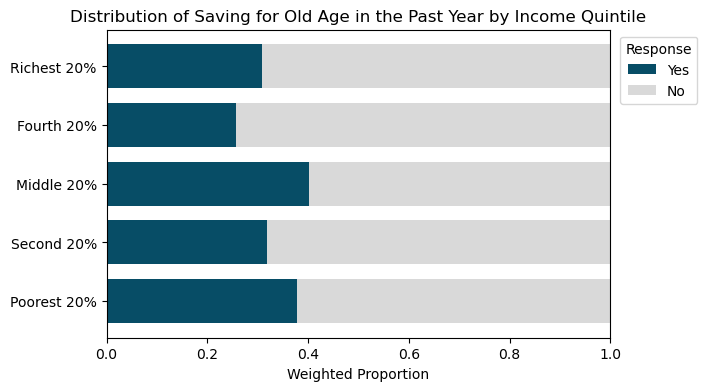

In [27]:
plot_stacked_barh(saving_old_age, 
                  responses=['Yes', 'No'],
                  palette=['#074D66','#D9D9D9'],
                  plot_title="Distribution of Saving for Old Age in the Past Year by Income Quintile")

#### Who Saves for Tomorrow? Financial Preparation for Retirement by Income Quintile

The bottom 40% lower-income households face strong income constraints, yet <b>nearly 38% of the poorest still report saving for old age</b> in the past 12 months. Their motivation may stem for insecurity about future income and limited safety nets.

Middle-income households show the <b>highest engagement in saving for old age</b> in the past 12 months at 40%. This segment often experiences both rising income and growing awareness of future risks but without yet the wealth that higher-income earners may enjoy.

Upper 40% higher-income households display <b>lower rates of self-reported savings for old age</b> at 25% to 31%. This could be because saving is embedded in asset accumulation rather than direct saving behavior.

This pattern suggests that <b>intentional saving for old age in the Philippines is driven more by perceived vulnerability and awareness than by sheer income level</b>. The middle class, in particular, emerges as the most active in preparing financially for later life, perhaps because they balance enough disposable income to save with still-limited access to comprehensive retirement schemes.

## Borrowing through formal (financial institutions) and informal means

In [28]:
findex_map[findex_map['question'].str.contains("borrow")]

,indicator_name,filter,question,key
10,fin10,"Fin1 or Fin2 = ""yes""","A credit card is a card that allows you to borrow money in order to make payments or buy things, and you can pay the balance off later. Do you, personally, have a credit card?",2
31,fin22a,NaN,"In the past 12 months, have you borrowed any money from a bank or a similar financial institution?",2
32,fin22a_1,"Fin12_13 = ""yes""","In the past 12 months, have you borrowed any money from your mobile money provider?",4
33,fin22b,NaN,"In the past 12 months, have you borrowed any money from family, relatives, or friends?",2
34,fin22c,"Fin17C = ""yes""","In the past 12 months, have you borrowed any money from informal savings group/club such as [insert local terminology for savings group/club]?",2
35,fin22d,NaN,"In the past 12 months, have you borrowed money for health or medical purposes?",2
36,fin22e,NaN,"In the past 12 months, have you borrowed money to start or operate a business?",2
40,fin23,"Fin22A, Fin22A_1, Fin22B, Fin22C, and Fin22G = ""no/dk/r""","In the past 12 months, have you borrowed money from any source for any reason?",2
43,fin24b,NaN,"Suppose your household lost its main source of income. About how long could you cover expenses by using savings, borrowing, selling something you own, seeking help from family and friends, or through some other way? Less than two weeks, about one month, about two months, or more than two months?",2


In [29]:
# Classify type of borrowing, whether formal or informal
ph['borrow_type'] = ph.apply(classify_borrowing, axis=1)

In [30]:
# Formality of borrowing by education
borrow_by_educ = compute_weighted_proportion(ph, col1='education', col2='borrow_type')
borrow_by_educ.sort_values(by=['Formal'], ascending=False)

borrow_type,Formal,Informal,No Borrowing
education,,,
Tertiary,0.281208,0.305820,0.412972
Secondary,0.093417,0.382601,0.523982
Primary or less,0.081312,0.440712,0.477976


Education clearly divides the borrowing landscape in the Philippines. Adults with **tertiary education** are **three times more likely to borrow formally** than those with only primary education (28.1% vs. 8.1%). Conversely, those with lower education rely far more heavily on informal borrowing from friends, family, or moneylenders.

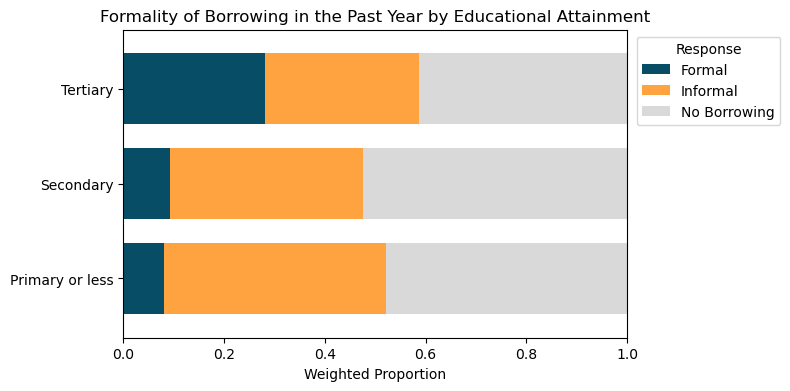

In [31]:
plot_stacked_barh(borrow_by_educ,
                  responses=['Formal', 'Informal', 'No Borrowing'],
                  palette=['#074D66','#FFA240','#D9D9D9'],
                  plot_title="Formality of Borrowing in the Past Year by Educational Attainment")

#### Education and Access: How Learning Opens Doors to Formal Credit

This pattern reflects <b>how education functions as a gateway to financial access</b>. Higher educational attainment often comes with better financial literacy, formal employment, and the documentation required for formal credit (such as payslips, IDs, and stable income). Lower educational attainment, by contrast, tends to correlate with informal labor, irregular income, and weaker links to banks or regulated lenders.

A striking point is that informal borrowing dominates among those with primary or less education at 44%, compared with just 31% among tertiary graduates. This suggests that as <b>education rises, people move toward safer, more formalized credit channels</b>.

In summary, expanding credit access for the less educated means rethinking how institutions engage, communicate, and design financial products that meet people where they are.

## Use of digital channels by birth generation

In [32]:
ph['anydigpayment'].describe()

count    1000.000000
mean        0.384000
std         0.486601
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: anydigpayment, dtype: float64

In the Microdata Codebook, <b>anydigpayment</b> is the variable name for <i>Made or received a digital payment</i> defined as <u>1</u> if respondent used mobile money, a card, or a mobile phone to make a payment from an account, or used the internet to pay bills or to buy something online or in a store, or paid bills or sent or received remittances directly from or into a financial institution account or through a mobile money account in the past year. It also includes respondents who received payments for agricultural products, government transfers, wages, or a public sector pension into a financial institution account or through a mobile money account in the past year. The variable value is <u>0</u> if the respondent did not make or receive a digital payment

In [33]:
ph['use_of_digital'] = ph['anydigpayment'].map({1:'Used', 0:'Did Not Use'})

In [34]:
# Use of digital channel by generation
use_of_digital = compute_weighted_proportion(ph, col1='generation', col2='use_of_digital')

gen_order = [
    'Generation Z (1997 to 2012)',
    'Millennials (1981 to 1996)', 
    'Generation X (1965 to 1980)',
    'Baby Boomers (1946 to 1964)',
    'Silent Generation (1928 to 1945)'
]

use_of_digital = use_of_digital.reindex(gen_order)
use_of_digital

use_of_digital,Did Not Use,Used
generation,,
Generation Z (1997 to 2012),0.493842,0.506158
Millennials (1981 to 1996),0.548850,0.451150
Generation X (1965 to 1980),0.719288,0.280712
Baby Boomers (1946 to 1964),0.770118,0.229882
Silent Generation (1928 to 1945),0.795074,0.204926


The data reveal a clear generational gradient in digital financial use:
- A slim majority of Generation Z or 50.6% of respondents born from 1997 to 2012 now use digital channels, marking them as the first Filipino generation for whom digital finance is mainstream.
- Among Millennials, usage dips slightly to 45.1%, reflecting both higher economic participation and perhaps greater caution toward digital transactions compared to Gen Z.
- For Generation X, usage drops sharply to 28.1%, and among Baby Boomers and the Silent Generation, fewer than one in four adults use digital finance at all.

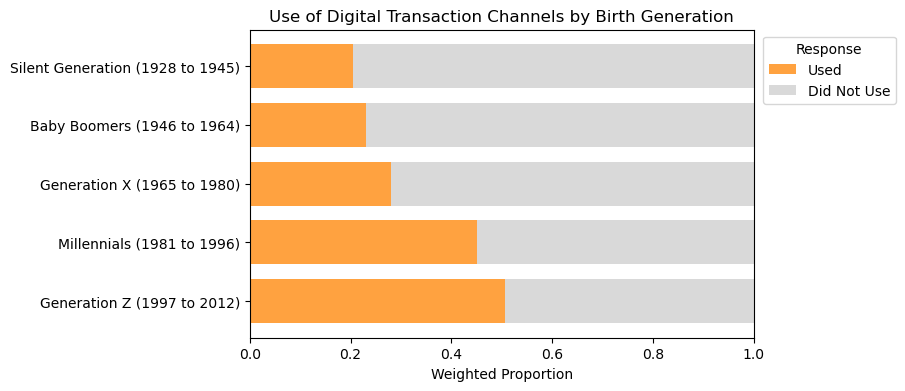

In [35]:
plot_stacked_barh(use_of_digital,
                  responses=['Used', 'Did Not Use'],
                  palette=['#FFA240','#D9D9D9'],
                  plot_title="Use of Digital Transaction Channels by Birth Generation")

#### A Digital Generation Gap: How Age Shapes Financial Connectivity

The Philippine financial landscape is rapidly digitalizing; however, not all generations are keeping pace.

Younger generations are roughly twice as likely to engage in digital transactions as those from Generation X or older. Among adults born before 1980, fewer than one in three use digital financial channels, suggesting lower integration of digital methods within older cohorts. The gap between Generation Z (50.6%) and the Silent Generation (20.5%) represents a 30-percentage-point difference, illustrating a <b>substantial generational divide in access or preference for digital finance</b>.

This variation matters for how financial services reach different age groups. While digital channels are becoming a standard mode of access, a significant share of older Filipinos remain outside that ecosystem.

# SUMMARY

The 2024 Global Findex data highlight clear differences in financial behavior across income, education, and generation in the Philippines. **Saving for old age is highest among the middle-income quintile**, with 40% reporting that they save, while the richest groups show lower rates.

Borrowing patterns differ by educational attainment. **Adults with tertiary education are more likely to borrow from formal institutions**, with 28% reporting formal borrowing, compared with 8% to 9% among those with primary or secondary schooling as informal borrowing is more common among those with lower education.

**Just over half of Generation Z adults report using digital finance**, followed by 45% of Millennials. Among Generation X, only 28% use digital channels, and usage drops to around 23% for Baby Boomers and 21% for the Silent Generation.

Together, these findings highlight that financial inclusion in the Philippines is advancing, but unevenly. Progress depends not only on expanding access, but also on tailoring financial products and education to the realities of different income groups, educational backgrounds, and generations.